# Домашнее задание 3 - Проверка статистических гипотез и параметрические критерии

**ВАЖНО: Обязательно для каждой задачи строим график и показываем куда попадает наше значение, если в задаче нужно проверить статистическую гипотезу**
\
**При отсутствии графиков возможна полная потеря баллов за задание**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t, poisson

### Задача 1 (1 балл)

Пусть X1,X2,…,Xn​ — независимые и одинаково распределенные случайные величины из нормального распределения с неизвестным средним μ и известной дисперсией σ^2=25. Из выборки объема n=64 получено выборочное среднее =102.
\
Проверьте гипотезу H0:μ=100 против альтернативы H1:μ>100 на уровне значимости α=0.01.
\
Вычислите p-значение этого теста.

In [5]:
# Исходные данные
sigma = np.sqrt(25)
n = 64
x_mean = 102
mu0 = 100
alpha = 0.01

In [11]:
# Стандартная ошибка
se = sigma / np.sqrt(n)
print(f"Стандартная ошибка (se): {se:.2f}")

# z-статистика
z_score = (x_mean - mu0) / se
print(f"z-статистика: {z_score:.2f}")

# Критическое значение
z_critical = norm.ppf(1 - alpha)
print(f"Критическое значение z_critical: {z_critical:.2f}")

# p-значение
p_value = 1 - norm.cdf(z_score)
print(f"p-значение: {p_value:.5f}")

# Принятие решения
if z_score > z_critical:
    print("Отклоняем нулевую гипотезу: среднее значение увеличилось")
else:
    print(
        "Не отклоняем нулевую гипотезу: нет статистически значимого снижения значения"
    )

Стандартная ошибка (se): 0.62
z-статистика: 3.20
Критическое значение z_critical: 2.33
p-значение: 0.00069
Отклоняем нулевую гипотезу: среднее значение увеличилось


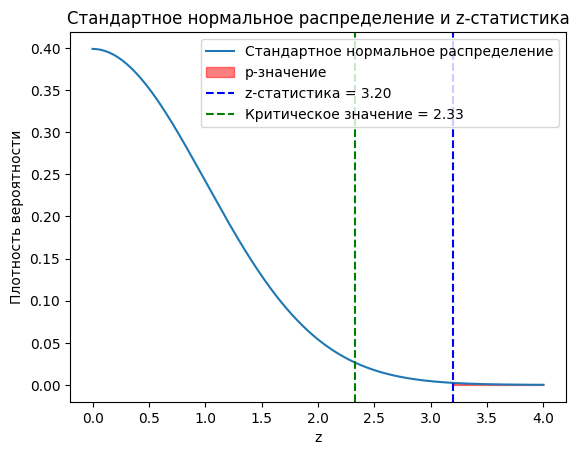

In [15]:
z_values = np.linspace(0, 4, 1000)
pdf = norm.pdf(z_values)

# Построение графика
plt.plot(z_values, pdf, label="Стандартное нормальное распределение")

# Закрашиваем области p-значения
plt.fill_between(
    z_values,
    pdf,
    where=(abs(z_values) >= abs(z_score)),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем z-статистику и критическое значение
plt.axvline(
    z_score, color="blue", linestyle="--", label=f"z-статистика = {z_score:.2f}"
)
plt.axvline(
    z_critical,
    color="green",
    linestyle="--",
    label=f"Критическое значение = {z_critical:.2f}",
)

plt.legend()
plt.title("Стандартное нормальное распределение и z-статистика")
plt.xlabel("z")
plt.ylabel("Плотность вероятности")

plt.show()

### Задача 2 (1 балл)

Даны три независимые выборки. Первая выборка объемом 35 наблюдений имеет выборочное среднее 10.2 и выборочную дисперсию 2.5. Вторая выборка объемом 30 наблюдений имеет выборочное среднее 9.8 и выборочную дисперсию 2.8. Третья выборка объемом 40 наблюдений имеет выборочное среднее 10.5 и выборочную дисперсию 3.0.

Проверьте гипотезу о том, что средние всех трех выборок равны, на уровне значимости 0.05.
Оцените статистическую значимость результатов и постройте доверительные интервалы c графиками для каждого из средних.

In [21]:
# Данные задачи
n1 = 35
x1_mean = 10.2
s1 = 2.5

n2 = 30
x2_mean = 9.8
s2 = 2.8

n3 = 40
x3_mean = 10.5
s3 = 3.0

alpha = 0.05

In [22]:
# Объединенная выборочная дисперсия
df = n1 + n2 + n3 - 3
sp3 = ((n1 - 1) * s1**2 + (n2 - 1) * s2**2 + (n3 - 1) * s3**2) / df
print(f"Объединенная выборочная дисперсия: {sp3:.2f}")

# Стандартная ошибка
se = np.sqrt(sp3 * (1 / n1 + 1 / n2 + 1 / n3))
print(f"Стандартная ошибка (se): {se:.2f}")

Объединенная выборочная дисперсия: 7.75
Стандартная ошибка (se): 0.82


In [25]:
# t-статистика
t_stat = (x2_mean - x1_mean) / se
print(f"t-статистика (группа B против группы A): {t_stat:.2f}")

# Критическое значение t
t_critical = t.ppf(1 - alpha, df)
print(f"Критическое значение t: {t_critical:.2f}")

# p-значение
p_value = 1 - t.cdf(t_stat, df)
print(f"p-значение (группа B против группы A): {p_value:.5f}")

# Принятие решения
if t_stat > t_critical:
    print(
        "Отклоняем нулевую гипотезу: средний результат в группе B значимо выше, чем в группе A"
    )
else:
    print(
        "Не отклоняем нулевую гипотезу: нет статистически значимого повышения среднего результата в группе B по сравнению с группой A"
    )

t-статистика (группа B против группы A): -0.49
Критическое значение t: 1.66
p-значение (группа B против группы A): 0.68645
Не отклоняем нулевую гипотезу: нет статистически значимого повышения среднего результата в группе B по сравнению с группой A


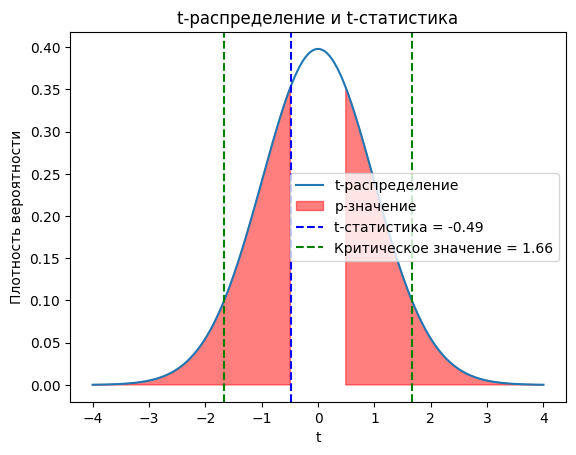

In [28]:
t_values = np.linspace(-4, 4, 1000)
pdf = t.pdf(t_values, df)

# Построение графика
plt.plot(t_values, pdf, label="t-распределение")

# Закрашиваем область p-значения
plt.fill_between(
    t_values,
    pdf,
    where=(abs(t_values) >= abs(t_stat)),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем t-статистику
plt.axvline(t_stat, color="blue", linestyle="--", label=f"t-статистика = {t_stat:.2f}")

# Отмечаем критическое значение
plt.axvline(
    t_critical,
    color="green",
    linestyle="--",
    label=f"Критическое значение = {t_critical:.2f}",
)
plt.axvline(-t_critical, color="green", linestyle="--")

plt.legend()
plt.title("t-распределение и t-статистика")
plt.xlabel("t")
plt.ylabel("Плотность вероятности")

plt.show()

In [30]:
# Аналогичные вычисления для группы C
t_stat = (x3_mean - x1_mean) / se
print(f"t-статистика (группа C против группы A): {t_stat:.2f}")

p_value = 1 - t.cdf(t_stat, df)
print(f"p-значение (группа C против группы A): {p_value:.2f}")

# Принятие решения
if t_stat > t_critical:
    print(
        "Отклоняем нулевую гипотезу: средний результат в группе C значимо выше, чем в группе A"
    )
else:
    print(
        "Не отклоняем нулевую гипотезу: нет статистически значимого повышения среднего результата в группе C по сравнению с группой A"
    )

t-статистика (группа C против группы A): 0.37
p-значение (группа C против группы A): 0.36
Не отклоняем нулевую гипотезу: нет статистически значимого повышения среднего результата в группе C по сравнению с группой A


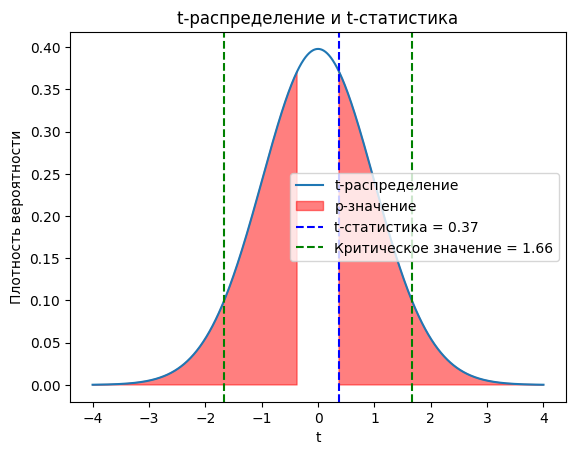

In [31]:
t_values = np.linspace(-4, 4, 1000)
pdf = t.pdf(t_values, df)

# Построение графика
plt.plot(t_values, pdf, label="t-распределение")

# Закрашиваем область p-значения
plt.fill_between(
    t_values,
    pdf,
    where=(abs(t_values) >= abs(t_stat)),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем t-статистику
plt.axvline(t_stat, color="blue", linestyle="--", label=f"t-статистика = {t_stat:.2f}")

# Отмечаем критическое значение
plt.axvline(
    t_critical,
    color="green",
    linestyle="--",
    label=f"Критическое значение = {t_critical:.2f}",
)
plt.axvline(-t_critical, color="green", linestyle="--")

plt.legend()
plt.title("t-распределение и t-статистика")
plt.xlabel("t")
plt.ylabel("Плотность вероятности")

plt.show()

### Задача 3 (1 балл)

Тестирование параметра распределения Пуассона

Выборка из 60 наблюдений была получена из распределения Пуассона с неизвестным параметром. Известно, что среднее количество наблюдений в выборке равно 4.8.

Проверьте гипотезу о том, что параметр распределения Пуассона равен 5 против альтернативы, что он меньше 5. Используйте уровень значимости 0.05.
Вычислите p-значение и сделайте вывод о гипотезе.

In [40]:
# Известные параметры
n = 60
x_mean = 4.8
mu0 = 5
alpha = 0.05

In [45]:
# z-статистика
z_score = (x_mean - mu0) / np.sqrt(mu0)
print(f"z-статистика: {z_score:.2f}")

# Критическое значение
z_critical = norm.ppf(1 - alpha / 2)
print(f"Критическое значение z_critical: {z_critical:.2f}")

# Вычисление p-значения
p_value = poisson.cdf(np.ceil(z_score), mu0)
print(f"p-значение: {p_value:.5f}")

# Принятие решения
if z_score > z_critical:
    print("Отклоняем нулевую гипотезу: параметр распределения Пуассона меньше 5")
else:
    print("Не отклоняем нулевую гипотезу: параметр распределения Пуассона равен 5")

z-статистика: -0.09
Критическое значение z_critical: 1.96
p-значение: 0.00674
Не отклоняем нулевую гипотезу: параметр распределения Пуассона равен 5


### Задача 4 (1 балл)

Компания заявляет, что среднее время работы их нового аккумулятора составляет 100 часов. Независимая лаборатория протестировала 25 случайно выбранных аккумуляторов и получила среднее время работы 95 часов при стандартном отклонении 10 часов. Можно ли на уровне значимости 1% утверждать, что реальное среднее время работы аккумуляторов меньше заявленного?

In [59]:
# Исходные данные
n = 25
x_mean = 95
sigma = 10
alpha = 0.01
mu0 = 100

In [60]:
# Стандартная ошибка
se = sigma / np.sqrt(n)
print(f"Стандартная ошибка (se): {se:.2f}")

# Вычисляем t-статистику
t_stat = (x_mean - mu0) / se
print(f"t-статистика: {t_stat:.2f}")

# Критическое значение
z_critical = norm.ppf(alpha)
print(f"Критическое значение z_critical: {z_critical:.2f}")

# Вычисляем p-значение
p_value = norm.cdf(z_score)
print(f"p-значение: {p_value:.5f}")

# Принятие решения
if t_stat > z_critical:
    print("Отклоняем нулевую гипотезу: среднее время работы меньше заявленной")
else:
    print(
        "Не отклоняем нулевую гипотезу: среднее время работы аккумулятора составляет 100 часов"
    )

Стандартная ошибка (se): 2.00
t-статистика: -2.50
Критическое значение z_critical: -2.33
p-значение: 0.46437
Не отклоняем нулевую гипотезу: среднее время работы аккумулятора составляет 100 часов


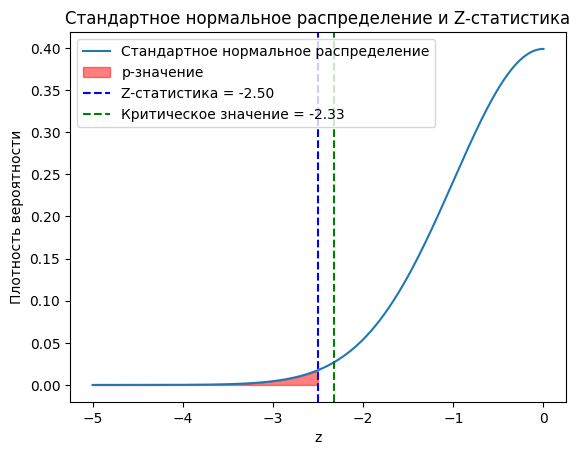

In [61]:
z_values = np.linspace(-5, 0, 1000)
pdf = norm.pdf(z_values)

# Построение графика
plt.plot(z_values, pdf, label="Стандартное нормальное распределение")

# Закрашиваем область p-значения
plt.fill_between(
    z_values,
    pdf,
    where=(z_values <= t_stat),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем Z-статистику и критическое значение
plt.axvline(t_stat, color="blue", linestyle="--", label=f"Z-статистика = {t_stat:.2f}")
plt.axvline(
    z_critical,
    color="green",
    linestyle="--",
    label=f"Критическое значение = {z_critical:.2f}",
)

plt.legend()
plt.title("Стандартное нормальное распределение и Z-статистика")
plt.xlabel("z")
plt.ylabel("Плотность вероятности")

plt.show()

### Задача 5 (1 балл)

В ходе медицинского исследования сравнивается эффективность нового препарата для снижения артериального давления с существующим. Первой группе из 30 пациентов назначают новый препарат, и среднее снижение давления составляет 8 мм рт. ст. со стандартным отклонением 2 мм рт. ст. Второй группе из 30 пациентов дают существующий препарат, и среднее снижение составляет 6 мм рт. ст. со стандартным отклонением 3 мм рт. ст. Является ли новый препарат более эффективным на уровне значимости 5%?

In [71]:
# Входные данные
n_new = 30
mean_new = 8
std_new = 2

n_old = 30
mean_old = 6
std_old = 3

alpha = 0.05

In [72]:
# Объединенная выборочная дисперсия
df = n_new + n_old - 2
sp2 = ((n_new - 1) * std_new**2 + (n_old - 1) * std_old**2) / df
print(f"Объединенная выборочная дисперсия: {sp2:.2f}")

# Стандартная ошибка
se = np.sqrt(sp2 * (1 / n_new + 1 / n_old))
print(f"Стандартная ошибка (se): {se:.2f}")

# t-статистика
t_stat = (mean_new - mean_old) / se
print(f"t-статистика: {t_stat:.2f}")

# Критическое значение t
t_critical = t.ppf(1 - alpha, df)
print(f"Критическое значение t: {t_critical:.2f}")

# p-значение
p_value = 1 - t.cdf(t_stat, df)
print(f"p-значение: {p_value:.5f}")

# Принятие решения
if t_stat > t_critical:
    print("Отклоняем нулевую гипотезу: новый препарат более эффективный")
else:
    print("Не отклоняем нулевую гипотезу: результат препаратов одинаковый")


Объединенная выборочная дисперсия: 6.50
Стандартная ошибка (se): 0.66
t-статистика: 3.04
Критическое значение t: 1.67
p-значение: 0.00178
Отклоняем нулевую гипотезу: новый препарат более эффективный


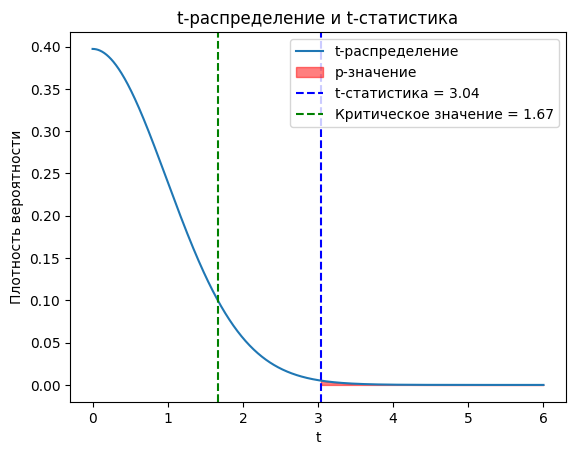

In [73]:
t_values = np.linspace(0, 6, 1000)
pdf = t.pdf(t_values, df)

# Построение графика
plt.plot(t_values, pdf, label="t-распределение")

# Закрашиваем область p-значения
plt.fill_between(
    t_values,
    pdf,
    where=(t_values >= t_stat),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем t-статистику
plt.axvline(t_stat, color="blue", linestyle="--", label=f"t-статистика = {t_stat:.2f}")

# Отмечаем критическое значение
plt.axvline(
    t_critical,
    color="green",
    linestyle="--",
    label=f"Критическое значение = {t_critical:.2f}",
)

plt.legend()
plt.title("t-распределение и t-статистика")
plt.xlabel("t")
plt.ylabel("Плотность вероятности")

plt.show()

### Задача 6 (1 балл)

В университете внедрили новую методику преподавания математики и хотят оценить ее влияние на успеваемость студентов. Средний балл по математике в предыдущие годы был 75. После внедрения методики группа из 50 студентов получила средний балл 78 с стандартным отклонением 5. Проверить на уровне значимости 1%, улучшилась ли успеваемость студентов.

In [80]:
# Исходные данные
mu0 = 75
x_mean = 78
sigma = 5
n = 50
alpha = 0.01

In [81]:
# Стандартная ошибка
se = sigma / np.sqrt(n)
print(f"Стандартная ошибка (se): {se:.2f}")

# z-статистика
z_score = (x_mean - mu0) / se
print(f"z-статистика: {z_score:.2f}")

# Критическое значение
z_critical = norm.ppf(1 - alpha)
print(f"Критическое значение z_critical: {z_critical:.2f}")

# p-значение
p_value = 1 - norm.cdf(z_score)
print(f"p-значение: {p_value:.5f}")

# Принятие решения
if z_score > z_critical:
    print("Отклоняем нулевую гипотезу: результат улучшился")
else:
    print("Не отклоняем нулевую гипотезу: результат не изменился")

Стандартная ошибка (se): 0.71
z-статистика: 4.24
Критическое значение z_critical: 2.33
p-значение: 0.00001
Отклоняем нулевую гипотезу: результат улучшился


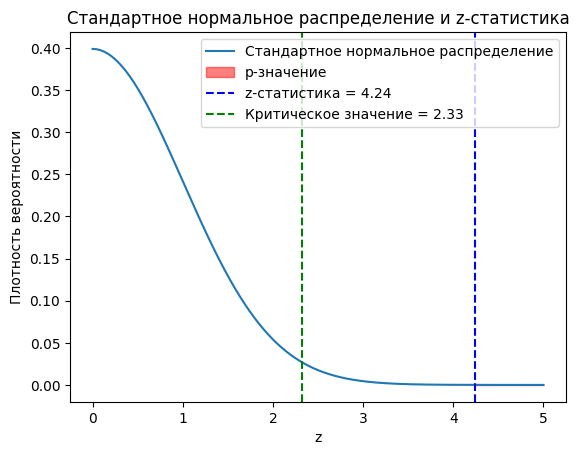

In [82]:
z_values = np.linspace(0, 5, 1000)
pdf = norm.pdf(z_values)

# Построение графика
plt.plot(z_values, pdf, label="Стандартное нормальное распределение")

# Закрашиваем области p-значения
plt.fill_between(
    z_values,
    pdf,
    where=(abs(z_values) >= abs(z_score)),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем z-статистику и критическое значение
plt.axvline(
    z_score, color="blue", linestyle="--", label=f"z-статистика = {z_score:.2f}"
)
plt.axvline(
    z_critical,
    color="green",
    linestyle="--",
    label=f"Критическое значение = {z_critical:.2f}",
)

plt.legend()
plt.title("Стандартное нормальное распределение и z-статистика")
plt.xlabel("z")
plt.ylabel("Плотность вероятности")

plt.show()

### Задача 7 (1 балл)

Производитель утверждает, что его новый процессор работает на 20% быстрее предыдущей модели. Для проверки этого заявления были протестированы 40 новых и 40 старых процессоров. Новые процессоры в среднем выполняли задачу за 8 секунд с стандартным отклонением 1 секунда, старые — за 10 секунд с стандартным отклонением 1,5 секунды. Соответствует ли утверждение производителя действительности на уровне значимости 2%?

In [ ]:
# Параметры для новых процессоров
new_mean = 8  # Среднее время выполнения задачи
new_std = 1  # Стандартное отклонение

# Параметры для старых процессоров
old_mean = 10  # Среднее время выполнения задачи
old_std = 1.5  # Стандартное отклонение

# Размер выборки
n_new = 40  # Количество новых процессоров
n_old = 40  # Количество старых процессоров

In [40]:
# Вычисление среднего времени выполнения задачи для новых процессоров
new_mean_time = np.mean(np.random.normal(new_mean, new_std, n_new))

# Вычисление среднего времени выполнения задачи для старых процессоров
old_mean_time = np.mean(np.random.normal(old_mean, old_std, n_old))

# Вычисление разницы средних
difference = new_mean_time - old_mean_time

# Вычисление t-статистики
t_stat = difference / np.sqrt(new_std**2 / n_new + old_std**2 / n_old)

# Вычисление p-значения
p_value = 1 - t.cdf(t_stat, n_new - 1)

# Уровень значимости
alpha = 0.02

# Проверка гипотезы
if p_value < alpha:
    print("Утверждение производителя подтверждается на уровне значимости 2%.")
else:
    print("Утверждение производителя не подтверждается на уровне значимости 2%.")

Утверждение производителя не подтверждается на уровне значимости 2%.


### Задача 8 (1 балл)

После введения новых экологических стандартов исследователь хочет определить, снизился ли уровень загрязнения воздуха в городе. До введения стандартов средняя концентрация вредных веществ составляла 50 мкг/м³. Через год после внедрения было проведено 36 измерений, и средняя концентрация составила 47 мкг/м³ со стандартным отклонением 4 мкг/м³. Можно ли на уровне значимости 5% считать, что уровень загрязнения воздуха снизился?

In [45]:
# Исходные данные
mean_before = 50  # Средняя концентрация до введения стандартов
mean_after = 47  # Средняя концентрация после введения стандартов
n = 36  # Количество измерений после введения стандартов
sd = 4  # Стандартное отклонение после введения стандартов

# Вычисление t-статистики
t_stat = (mean_after - mean_before) / (sd / np.sqrt(n))

# Определение критического значения t-статистики
alpha = 0.05  # Уровень значимости
degrees_of_freedom = n - 1  # Степени свободы
critical_value = t.ppf(1 - alpha, degrees_of_freedom)

# Сравнение t-статистики с критическим значением
if t_stat > critical_value:
    print("Уровень загрязнения воздуха снизился на уровне значимости 5%.")
else:
    print(
        "Недостаточно данных для подтверждения снижения уровня загрязнения воздуха на уровне значимости 5%."
    )


Недостаточно данных для подтверждения снижения уровня загрязнения воздуха на уровне значимости 5%.


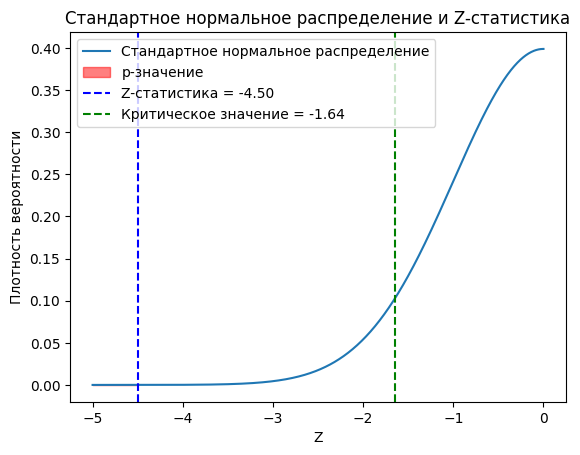

In [46]:
# Создание диапазона значений Z
z_values = np.linspace(-5, 0, 1000)
pdf = norm.pdf(z_values)

# Критическое значение
Z_alpha = norm.ppf(alpha)

# Построение графика
plt.plot(z_values, pdf, label="Стандартное нормальное распределение")

# Закрашиваем область p-значения
plt.fill_between(
    z_values,
    pdf,
    where=(z_values <= t_stat),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем Z-статистику и критическое значение
plt.axvline(t_stat, color="blue", linestyle="--", label=f"Z-статистика = {t_stat:.2f}")
plt.axvline(
    Z_alpha,
    color="green",
    linestyle="--",
    label=f"Критическое значение = {Z_alpha:.2f}",
)

plt.legend()
plt.title("Стандартное нормальное распределение и Z-статистика")
plt.xlabel("Z")
plt.ylabel("Плотность вероятности")
plt.show()

### Задача 9 (1 балл)

В школе проводят эксперимент, чтобы выяснить, влияет ли дополнительное занятие по чтению на скорость чтения учеников. Учеников случайным образом разделили на две группы по 20 человек. Первая группа занималась по стандартной программе и показала среднюю скорость чтения 150 слов в минуту со стандартным отклонением 15 слов. Вторая группа посещала дополнительные занятия и показала среднюю скорость 160 слов в минуту со стандартным отклонением 10 слов. Является ли разница в скоростях статистически значимой на уровне значимости 5%?

In [47]:
# Параметры первой группы
mean_1 = 150
std_dev_1 = 15

# Параметры второй группы
mean_2 = 160
std_dev_2 = 10

# Размер выборки
n_1 = 20
n_2 = 20

# Вычисление среднего значения и стандартного отклонения для разницы средних
mean_diff = mean_2 - mean_1
std_diff = np.sqrt(std_dev_1**2 / n_1 + std_dev_2**2 / n_2)

# Вычисление t-статистики
t_stat = (mean_diff - 0) / std_diff

# Вычисление p-значения
p_value = 2 * (1 - t.cdf(abs(t_stat), n_1 + n_2 - 2))

# Проверка значимости на уровне 5%
if p_value < 0.05:
    print("Разница в скоростях статистически значима на уровне значимости 5%.")
else:
    print(
        "Разница в скоростях не является статистически значимой на уровне значимости 5%."
    )

Разница в скоростях статистически значима на уровне значимости 5%.


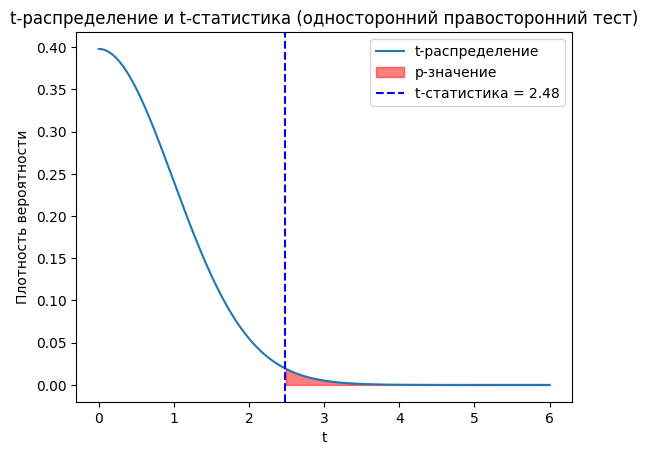

In [48]:
# Диапазон значений t
t_values = np.linspace(0, 6, 1000)
pdf = t.pdf(t_values, df)

# Критическое значение
t_critical = t.ppf(1 - alpha, df)

# Построение графика
plt.plot(t_values, pdf, label="t-распределение")

# Закрашиваем область p-значения
plt.fill_between(
    t_values,
    pdf,
    where=(t_values >= t_stat),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем t-статистику
plt.axvline(t_stat, color="blue", linestyle="--", label=f"t-статистика = {t_stat:.2f}")

plt.legend()
plt.title("t-распределение и t-статистика (односторонний правосторонний тест)")
plt.xlabel("t")
plt.ylabel("Плотность вероятности")
plt.show()

### Задача 10 (1 балл)

Автомобильная компания хочет определить, влияет ли новый тип топлива на эффективность расхода топлива. В тесте участвовали 30 автомобилей, использующих обычное топливо, и 30 автомобилей на новом топливе. Средний расход для обычного топлива составил 8 литров на 100 км с стандартным отклонением 0,5 литра, для нового топлива — 7,5 литров на 100 км с стандартным отклонением 0,4 литра. Проверьте на уровне значимости 1%, улучшает ли новый тип топлива эффективность.

In [49]:
# Параметры для обычного топлива
mean_conventional = 8  # литров на 100 км
std_dev_conventional = 0.5  # литров

# Параметры для нового топлива
mean_new_fuel = 7.5  # литров на 100 км
std_dev_new_fuel = 0.4  # литров

# Количество автомобилей для каждого типа топлива
n_conventional = 30
n_new_fuel = 30

# Вычисление среднего и стандартного отклонения для каждого типа топлива
mean_conventional_sample = np.mean(
    np.random.normal(mean_conventional, std_dev_conventional, n_conventional)
)
mean_new_fuel_sample = np.mean(
    np.random.normal(mean_new_fuel, std_dev_new_fuel, n_new_fuel)
)

# Вычисление разницы средних
difference_mean = mean_conventional_sample - mean_new_fuel_sample

# Вычисление стандартного отклонения разницы средних
std_dev_difference = np.sqrt(
    std_dev_conventional**2 / n_conventional + std_dev_new_fuel**2 / n_new_fuel
)

# Вычисление t-статистики
t_statistic = difference_mean / std_dev_difference

# Вычисление p-значения
p_value = 2 * (1 - t.cdf(np.abs(t_statistic), n_conventional + n_new_fuel - 2))

# Проверка гипотезы на уровне значимости 1%
if p_value < 0.01:
    print(
        "Новый тип топлива улучшает эффективность расхода топлива на уровне значимости 1%."
    )
else:
    print(
        "Не удалось доказать, что новый тип топлива улучшает эффективность расхода топлива на уровне значимости 1%."
    )

Новый тип топлива улучшает эффективность расхода топлива на уровне значимости 1%.


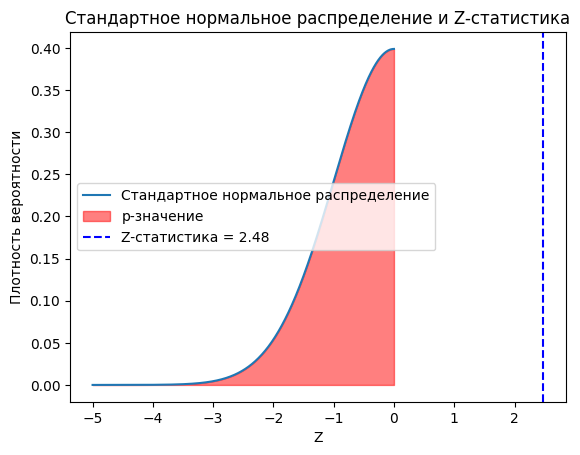

In [50]:
# Создание диапазона значений Z
z_values = np.linspace(-5, 0, 1000)
pdf = norm.pdf(z_values)

# Критическое значение
Z_alpha = norm.ppf(alpha)

# Построение графика
plt.plot(z_values, pdf, label="Стандартное нормальное распределение")

# Закрашиваем область p-значения
plt.fill_between(
    z_values,
    pdf,
    where=(z_values <= t_stat),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем Z-статистику и критическое значение
plt.axvline(t_stat, color="blue", linestyle="--", label=f"Z-статистика = {t_stat:.2f}")

plt.legend()
plt.title("Стандартное нормальное распределение и Z-статистика")
plt.xlabel("Z")
plt.ylabel("Плотность вероятности")
plt.show()

### Задача 11 (1 балл)

В исследовании психологии изучается влияние медитации на уровень стресса. Уровень стресса измеряется по шкале от 0 до 100. До начала программы медитации у группы из 25 участников средний уровень стресса был 70 с стандартным отклонением 8. После программы средний уровень снизился до 65 с стандартным отклонением 7. Является ли снижение уровня стресса статистически значимым на уровне значимости 5%?

In [51]:
# Исходные данные
before_mean = 70
before_std = 8
after_mean = 65
after_std = 7

# Вычисление t-статистики
t_stat = (after_mean - before_mean) / np.sqrt(
    (before_std**2 / 25) + (after_std**2 / 25)
)

# Вычисление степеней свободы
df = 25

# Определение критического значения t-статистики
critical_value = t.ppf(1 - 0.05 / 2, df)

# Сравнение t-статистики с критическим значением
if t_stat > critical_value:
    print("Снижение уровня стресса статистически значимо на уровне значимости 5%.")
else:
    print(
        "Снижение уровня стресса не является статистически значимым на уровне значимости 5%."
    )


Снижение уровня стресса не является статистически значимым на уровне значимости 5%.


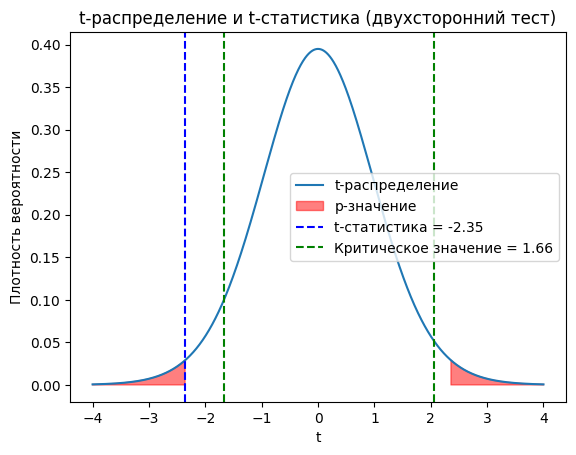

In [52]:
# Диапазон значений t
t_values = np.linspace(-4, 4, 1000)
pdf = t.pdf(t_values, df)

# Построение графика
plt.plot(t_values, pdf, label="t-распределение")

# Закрашиваем область p-значения
plt.fill_between(
    t_values,
    pdf,
    where=(abs(t_values) >= abs(t_stat)),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем t-статистику
plt.axvline(t_stat, color="blue", linestyle="--", label=f"t-статистика = {t_stat:.2f}")

# Отмечаем критическое значение
plt.axvline(
    critical_value,
    color="green",
    linestyle="--",
    label=f"Критическое значение = {t_critical:.2f}",
)
plt.axvline(-t_critical, color="green", linestyle="--")

plt.legend()
plt.title("t-распределение и t-статистика (двухсторонний тест)")
plt.xlabel("t")
plt.ylabel("Плотность вероятности")

plt.show()

### Задача 12 (1 балл)

Компания по производству напитков изменила рецепт своего продукта и хочет определить, повлияло ли это на предпочтения потребителей. В тестировании участвовали 200 человек, из которых 110 предпочли новый рецепт, а остальные остались нейтральны или выбрали старый. Можно ли на уровне значимости 1% утверждать, что большинство потребителей предпочитают новый рецепт?

In [53]:
# Количество людей, предпочитающих новый рецепт
new_recipe_count = 110

# Общее количество людей в тестировании
total_people = 200

# Доля людей, предпочитающих новый рецепт
p_hat = new_recipe_count / total_people

# Уровень значимости
alpha = 0.01

# Нулевая гипотеза: люди не предпочитают новый рецепт (p0=0.5)
null_hypothesis = 0.5

# Альтернативная гипотеза: люди предпочитают новый рецепт (p > 0.5)
alternative_hypothesis = 0.5

# Вычисление z-статистики
z_statistic = (p_hat - null_hypothesis) / np.sqrt(
    null_hypothesis * (1 - null_hypothesis) / total_people
)

# Проверка значимости
p_value = 1 - norm.cdf(abs(z_statistic))

# Вывод результата
if p_value < alpha:
    print(
        "На уровне значимости 1% можно утверждать, что большинство потребителей предпочитают новый рецепт."
    )
else:
    print(
        "На уровне значимости 1% нельзя утверждать, что большинство потребителей предпочитают новый рецепт."
    )

На уровне значимости 1% нельзя утверждать, что большинство потребителей предпочитают новый рецепт.


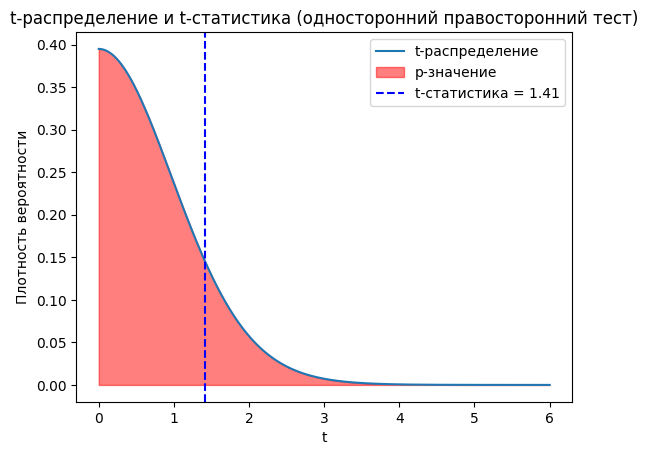

In [54]:
# Диапазон значений t
t_values = np.linspace(0, 6, 1000)
pdf = t.pdf(t_values, df)

# Критическое значение
t_critical = t.ppf(1 - alpha, df)

# Построение графика
plt.plot(t_values, pdf, label="t-распределение")

# Закрашиваем область p-значения
plt.fill_between(
    t_values,
    pdf,
    where=(t_values >= t_stat),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем t-статистику
plt.axvline(
    z_statistic, color="blue", linestyle="--", label=f"t-статистика = {z_statistic:.2f}"
)

plt.legend()
plt.title("t-распределение и t-статистика (односторонний правосторонний тест)")
plt.xlabel("t")
plt.ylabel("Плотность вероятности")
plt.show()

### Задача 13 (1 балл)

В ходе эксперимента изучается влияние нового удобрения на рост растений. Группе из 15 растений добавляли новое удобрение, и средний рост составил 25 см с стандартным отклонением 3 см. Контрольная группа из 15 растений без удобрения показала средний рост 22 см с стандартным отклонением 2,5 см. Проверить на уровне значимости 5%, является ли разница в росте статистически значимой.

In [55]:
# Данные эксперимента
treatment_sample_size = 15
treatment_mean = 25
treatment_std = 3

control_sample_size = 15
control_mean = 22
control_std = 2.5

# Вычисление t-статистики
treatment_variance = treatment_std**2
control_variance = control_std**2
treatment_sample_mean = treatment_mean
control_sample_mean = control_mean

# Вычисление степеней свободы
degrees_of_freedom = min(treatment_sample_size - 1, control_sample_size - 1)

# Вычисление t-статистики
t_statistic = (treatment_sample_mean - control_sample_mean) / np.sqrt(
    (treatment_variance / treatment_sample_size)
    + (control_variance / control_sample_size)
)

# Вычисление p-значения
p_value = 2 * (1 - t.cdf(np.abs(t_statistic), degrees_of_freedom))

# Проверка значимости
if p_value < 0.05:
    print("Разница в росте статистически значима на уровне 5%.")
else:
    print("Разница в росте не является статистически значимой на уровне 5%.")

Разница в росте статистически значима на уровне 5%.


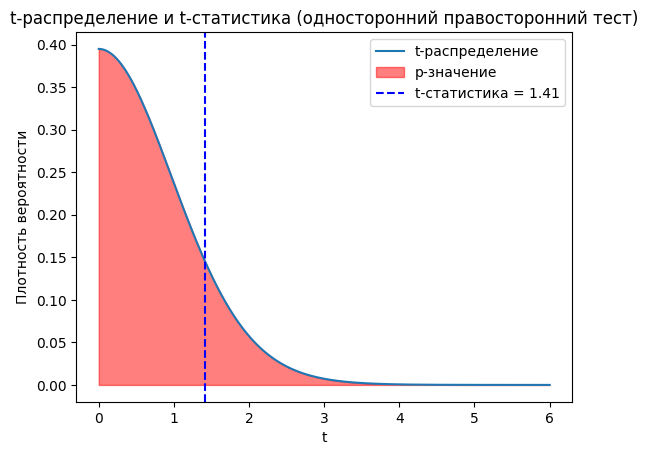

In [56]:
# Диапазон значений t
t_values = np.linspace(0, 6, 1000)
pdf = t.pdf(t_values, df)

# Критическое значение
t_critical = t.ppf(1 - alpha, df)

# Построение графика
plt.plot(t_values, pdf, label="t-распределение")

# Закрашиваем область p-значения
plt.fill_between(
    t_values,
    pdf,
    where=(t_values >= t_stat),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем t-статистику
plt.axvline(
    z_statistic, color="blue", linestyle="--", label=f"t-статистика = {z_statistic:.2f}"
)

plt.legend()
plt.title("t-распределение и t-статистика (односторонний правосторонний тест)")
plt.xlabel("t")
plt.ylabel("Плотность вероятности")
plt.show()

### Задача 14 (5 баллов за все пункты)

Пункт 1. Компания внедряет новую программу обучения сотрудников с целью повышения производительности труда. Ранее средняя производительность составляла 50 единиц в день при стандартном отклонении 8 единиц. После года действия программы случайно выбранная выборка из 80 сотрудников показала среднюю производительность 52 единицы. Считаем, что стандартное отклонение осталось неизменным. Можно ли на основе этих данных утверждать, что программа обучения действительно повысила производительность, или наблюдаемый результат мог возникнуть случайно? Сформулируйте нулевую и альтернативную гипотезы, определите тип теста (двусторонний, левосторонний или правосторонний) и проверьте нулевую гипотезу на уровнях значимости α = 1% и α = 5%.


---

Пункт 2. Решите пункт 1, если выборка состоит лишь из 5 сотрудников.


---

Пункт 3. Решите пункт 1 при условии, что стандартное отклонение увеличилось до 16 единиц.


---

Пункт 4. Решите пункт 1, если после внедрения программы средняя производительность составила 51 единицу.


---

Пункт 5. Решите пункт 1, если стандартное отклонение неизвестно, а выборка составила 25 сотрудников. Несмещённая оценка дисперсии выборки составила 64. Примите уровень значимости равным 5%.

### Задача 15 (3 балла за все пункты)

Задача 1. Компания оценивает эффективность нового программного обеспечения для повышения производительности сотрудников. Перед установкой ПО среднее время выполнения определённой задачи у 60 сотрудников составляло 100 минут с известным стандартным отклонением 12 минут. После установки нового ПО среднее время выполнения той же задачи снизилось до 95 минут. Считаем, что стандартное отклонение осталось неизменным. Можно ли на уровне значимости α = 5% утверждать, что новое ПО действительно снижает время выполнения задачи? Сформулируйте нулевую и альтернативную гипотезы, определите тип теста и проверьте нулевую гипотезу.


---

Задача 2. Решите задачу 1, если стандартное отклонение после установки нового ПО неизвестно, а выборка составляет 25 сотрудников. По полученным данным несмещённая оценка дисперсии после установки ПО составляет 144 минуты².


---

Задача 3. Компания сравнивает эффективность двух независимых групп сотрудников: первая группа из 50 человек использует старое ПО, вторая группа из 50 человек — новое ПО. Среднее время выполнения задачи в первой группе составляет 100 минут со стандартным отклонением 12 минут, во второй группе — 95 минут со стандартным отклонением 12 минут. Можно ли на уровне значимости α = 5% утверждать, что новое ПО снижает время выполнения задачи по сравнению со старым?


---

Задача 4. Для оценки влияния обучающего курса на навыки сотрудников компания измеряет время выполнения задачи у 30 сотрудников до и после прохождения курса. Среднее время до обучения составляет 80 минут, после обучения — 75 минут. Известно, что стандартное отклонение разностей времени (до и после) составляет 5 минут. Можно ли на уровне значимости α = 1% утверждать, что обучение улучшило навыки сотрудников? Сформулируйте нулевую и альтернативную гипотезы и выберите подходящий статистический тест.


---

Задача 5. Решите задачу 4, если стандартное отклонение разностей времени неизвестно, а несмещённая оценка дисперсии разностей составляет 25 минут². Примите уровень значимости равным 1%.

### Задача 16 (4 балла за все пункты)

Монетку подбросили n=150 раз. Из них выпало Y орлов. Вероятность выпадения орла равна p.

(a) При каких значениях Y вы отвергнете нулевую гипотезу H0:p=1/2 против односторонней альтернативы p>1/2 на уровне значимости α=0.05?

(b) Предположим, что на самом деле H0​ не выполняется, а выполняется H1​, и вероятность выпадения орла равна p=1/2+δ, где δ=1/10. При этом мы не знаем точное значение pp, но действуем согласно нашему критерию. С какой вероятностью мы при этом отвергнем гипотезу H0​? Какова вероятность совершить ошибку второго рода (не отвергнуть H0​, когда H1​ истинна)?

(c) Решите ту же задачу для δ=1/100.

(d) Решите ту же задачу для δ=1/100 и n=1000.